In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import *

tf.__version__
keras.__version__

'2.4.0'

In [3]:
from tensorflow.keras.layers import Embedding

In [4]:
embedding_layer = Embedding(1000, 64)

In [5]:
import tensorflow.keras.datasets.imdb as imdb
from tensorflow.keras import preprocessing
max_words = 10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_words)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [6]:
len(x_train[0])

100

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, 
                    epochs=2, batch_size=32, 
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3201      
Total params: 323,201
Trainable params: 323,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5386 - acc: 0.7372 - val_loss: 0.3738 - val_acc: 0.8350
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2971 - acc: 0.8764 - val_loss: 0.3245 - val_acc: 0.8598
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2286 - acc: 0.9086 - val_loss: 0.3231 - 

In [8]:
history.history

{'loss': [0.538595974445343,
  0.2970779240131378,
  0.22863620519638062,
  0.17748034000396729,
  0.12964199483394623,
  0.08812540024518967,
  0.05392059311270714,
  0.030405111610889435,
  0.015814008191227913,
  0.007822693325579166],
 'acc': [0.7372000217437744,
  0.8763999938964844,
  0.9086499810218811,
  0.9356499910354614,
  0.9557499885559082,
  0.974049985408783,
  0.9879000186920166,
  0.9945999979972839,
  0.9976999759674072,
  0.9991000294685364],
 'val_loss': [0.37384068965911865,
  0.32446199655532837,
  0.32314738631248474,
  0.33125028014183044,
  0.34581318497657776,
  0.36493799090385437,
  0.3883470892906189,
  0.4206213355064392,
  0.4568294286727905,
  0.5005258321762085],
 'val_acc': [0.8349999785423279,
  0.8597999811172485,
  0.8574000000953674,
  0.8574000000953674,
  0.8550000190734863,
  0.8511999845504761,
  0.8482000231742859,
  0.8417999744415283,
  0.8402000069618225,
  0.8375999927520752]}

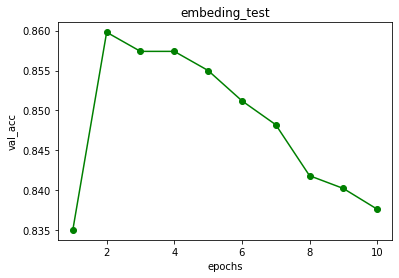

In [9]:
val_acc = history.history['val_acc']
epochs = range(1, len(val_acc)+1)
#可使用axis设定坐标轴取值范围
#plt.axis
plt.plot(epochs, val_acc, 'bo-', color='green', label='val_acc_haha')
plt.xlabel('epochs')
plt.ylabel('val_acc')
plt.title('embeding_test')
plt.show()

In [10]:
val_acc

[0.8349999785423279,
 0.8597999811172485,
 0.8574000000953674,
 0.8574000000953674,
 0.8550000190734863,
 0.8511999845504761,
 0.8482000231742859,
 0.8417999744415283,
 0.8402000069618225,
 0.8375999927520752]

In [11]:
import os
imdb_dir = '/Users/haoxuefeng/Documents/project/nn/keras/imdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [12]:
len(texts)
texts[0]

"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form."

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100 #截取前100个词
training_samples = 200 
validation_samples = 10000
max_words = 20000 #只考虑topx的词汇
#初始化token分析器
tokenizer = Tokenizer(num_words = max_words)
#分析文本数组
tokenizer.fit_on_texts(texts)
#将文本数组转化为word_index序列
sequences = tokenizer.texts_to_sequences(texts)

In [29]:
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples:training_samples+validation_samples]
y_test = labels[training_samples:training_samples+validation_samples]


In [37]:
glove_dir='/Users/haoxuefeng/Documents/project/nn/keras/glove/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6b.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [38]:
len(embeddings_index)

400000

In [39]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [40]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [-0.024665  ,  0.23069   ,  0.028931  , ...,  0.82340002,
        -0.85237002,  0.64449   ],
       [-0.82413   ,  0.57309002, -0.43753999, ..., -0.10303   ,
         0.27105999, -0.18929   ],
       [-0.86017001,  0.13195001,  0.20563   , ..., -0.22751001,
        -0.68043   ,  0.55172998]])

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='selu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,320,065
Trainable params: 2,320,065
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 43ms/step - loss: 0.3304 - acc: 0.9050 - val_loss: 0.9283 - val_acc: 0.5066
Epoch 2/10
20/20 [==============================] - 1s 38ms/step - loss: 0.1037 - acc: 0.9450 - val_loss: 1.5332 - val_acc: 0.5044
Epoch 3/10
20/20 [==============================] - 1s 38ms/step - loss: 0.2209 - acc: 0.9550 - val_loss: 1.3661 - val_acc: 0.5034
Epoch 4/10
20/20 [==============================] - 1s 39ms/step - loss: 0.0090 - acc: 1.0000 - val_loss: 1.1114 - val_acc: 0.5056
Epoch 5/10
20/20 [==============================] - 1s 39ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.2065 - val_acc: 0.5037
Epoch 6/10
20/20 [==============================] - 1s 43ms/step - loss: 0.1455 - acc: 0.9700 - val_loss: 1.4656 - val_acc: 0.5069
Epoch 7/10
20/20 [==============================] - 1s 43ms/step - loss: 9.7671e-04 - acc: 1.0000 - val_loss: 1.3900 - val_acc: 0.5076
Epoch 8/10
20/20 [==============================] - 1s 42ms/step - loss: 4.7927

In [48]:
model.save_weights(os.path.join(
    '/Users/haoxuefeng/Documents/project/nn/keras/',
    'pre_trained_glove_model.h5'))

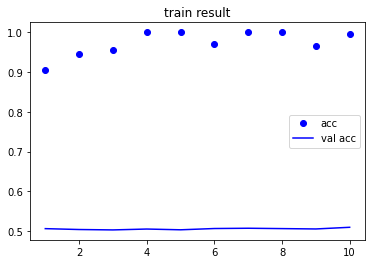

In [54]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='acc')
plt.plot(epochs, val_acc, 'b', label='val acc')
plt.title('train result')
plt.legend()
plt.show()

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,320,065
Trainable params: 2,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 0s 65ms/step - loss: 0.6979 - acc: 0.4750 - val_loss: 0.6931 - val_acc: 0.5046
Epoch 2/10
7/7 [==============================] - 0s 56ms/step - loss: 0.5178 - acc: 1.0000 - val_loss: 0.6971 - 

In [58]:
model.load_weights('pre_trained_glove_model.h5')

In [59]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.1309 - acc: 0.5063


[1.1309330463409424, 0.5062999725341797]